<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/01_pytorch_workflow.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=15419)

# 01. PyTorch 工作流基础

机器学习和深度学习的本质是从过去的一些数据中构建一个算法（例如神经网络），以发现其中的模式，然后利用这些发现的模式来预测未来。

实现这一目标有很多方法，而且很多新的方法也在不断被发现。

但让我们从简单的开始。

我们从一条直线开始怎么样？

然后我们看看是否能构建一个 PyTorch 模型来学习这条直线的模式并进行匹配。


## 我们将要覆盖的内容

在本模块中，我们将覆盖一个标准的 PyTorch 工作流（可以根据需要进行调整，但它涵盖了主要步骤的框架）。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

目前，我们将使用这个工作流来预测一条简单的直线，但根据你所处理的问题，工作流步骤可以重复使用并进行更改。

具体来说，我们将覆盖以下内容：

| **主题**               | **内容**                                                           |
| -------------------- | ---------------------------------------------------------------- |
| **1. 数据准备**          | 数据几乎可以是任何东西，但为了开始，我们将创建一条简单的直线。                                  |
| **2. 构建模型**          | 在这里，我们将创建一个模型来学习数据中的模式，我们还将选择一个 **损失函数**、**优化器** 并构建一个 **训练循环**。 |
| **3. 将模型拟合到数据（训练）**  | 我们有了数据和模型，现在让我们让模型（尝试）在（**训练**）数据中找到模式。                          |
| **4. 进行预测并评估模型（推理）** | 我们的模型已经找到了数据中的模式，让我们将其结果与实际的（**测试**）数据进行比较。                      |
| **5. 保存和加载模型**       | 你可能希望在其他地方使用你的模型，或者稍后再回来，下面我们将介绍如何做到这一点。                         |
| **6. 将所有步骤结合起来**     | 让我们将上述所有步骤结合在一起。                                                 |


## 哪里可以获得帮助？

本课程的所有材料都可以在 [GitHub 上找到](https://github.com/mrdbourke/pytorch-deep-learning)。

如果遇到问题，你也可以在 [讨论页面](https://github.com/mrdbourke/pytorch-deep-learning/discussions) 上提问。

此外，还有 [PyTorch 开发者论坛](https://discuss.pytorch.org/)，这是一个非常有帮助的地方，适合所有与 PyTorch 相关的内容。

让我们从将我们将要覆盖的内容整理成字典开始，方便以后参考。


In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

现在，让我们导入本模块所需的内容。

我们将导入 `torch`、`torch.nn`（`nn` 代表神经网络，这个包包含了创建神经网络的构建块）和 `matplotlib`。


In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

## 1. 数据（准备和加载）

我想强调的是，机器学习中的“数据”几乎可以是你能想象的任何东西。可以是数字表格（比如一个大的 Excel 电子表格）、任何类型的图像、视频（YouTube 上有大量数据！）、音频文件，如歌曲或播客、蛋白质结构、文本等等。

![机器学习是一个由两部分组成的游戏：1. 将你的数据转化为一个代表性的数字集合，2. 选择或构建一个模型，以最佳方式学习这些表示](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)

机器学习是由两部分组成的游戏：

1. 将你的数据，无论它是什么，转化为数字（一个表示）。
2. 选择或构建一个模型，以尽可能最佳的方式学习这个表示。

有时，第一步和第二步可以同时进行。

但是如果你没有数据怎么办？

好吧，这就是我们现在的情况。

没有数据。

但我们可以创建一些。

让我们创建一个简单的直线数据。

我们将使用 [线性回归](https://en.wikipedia.org/wiki/Linear_regression) 来创建具有已知 **参数**（可以通过模型学习的内容）的数据，然后我们将使用 PyTorch 来看看是否可以构建一个模型，通过 [**梯度下降**](https://en.wikipedia.org/wiki/Gradient_descent) 来估计这些参数。

如果上面提到的术语现在听起来不太懂，也不用担心，我们将通过实践来学习这些内容，并且我会在下面提供额外的资源，你可以进一步学习。


In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

太棒了！现在我们将开始构建一个模型，能够学习 `X`（**特征**）和 `y`（**标签**）之间的关系。


### 将数据拆分为训练集和测试集

我们有一些数据。

但是在构建模型之前，我们需要将数据拆分。

机器学习项目中最重要的步骤之一就是创建训练集和测试集（在需要时，还要创建验证集）。

数据集的每个拆分都有特定的目的：

| 拆分      | 目的                                  | 数据量占比    | 使用频率      |
| ------- | ----------------------------------- | -------- | --------- |
| **训练集** | 模型从这些数据中学习（就像你在学期中学习的课程材料）。         | \~60-80% | 总是使用      |
| **验证集** | 模型在这些数据上进行调优（就像你在期末考试前进行的模拟考试）。     | \~10-20% | 经常使用，但不总是 |
| **测试集** | 模型在这些数据上进行评估，以测试它学到了什么（就像学期末的期末考试）。 | \~10-20% | 总是使用      |

现在，我们只使用训练集和测试集，这意味着我们将有一个数据集供模型学习，并在上面进行评估。

我们可以通过拆分我们的 `X` 和 `y` 张量来创建它们。

> **注意：** 在处理真实世界数据时，这个步骤通常会在项目开始时就完成（测试集应该始终与其他数据分开）。我们希望模型从训练数据中学习，然后在测试数据上评估，以了解它如何 **泛化** 到未见过的示例。


In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

太棒了，我们有 40 个训练样本（`X_train` 和 `y_train`）和 10 个测试样本（`X_test` 和 `y_test`）。

我们创建的模型将尝试学习 `X_train` 和 `y_train` 之间的关系，然后我们将在 `X_test` 和 `y_test` 上评估它所学到的内容。

但现在我们的数据只是页面上的数字。

让我们创建一个函数来可视化它。


In [5]:
def plot_predictions(train_data=X_train,
            train_labels=y_train,
            test_data=X_test,
            test_labels=y_test,
            predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

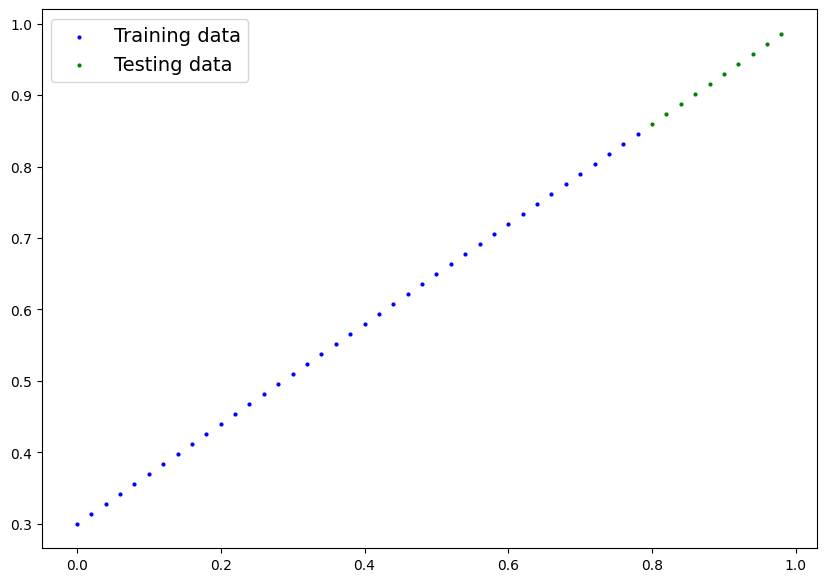

In [6]:
plot_predictions();

太棒了！

现在，我们的数据不再只是页面上的数字，而是一条直线。

> **注意：** 现在是时候向你介绍数据探索者的座右铭了... "可视化，可视化，再可视化！"
>
> 每当你处理数据并将其转化为数字时，请记住这一点。如果你能可视化某个东西，它对于理解会有很大的帮助。
>
> 机器喜欢数字，我们人类也喜欢数字，但我们也喜欢看东西。


## 2. 构建模型

现在我们有了一些数据，让我们构建一个模型，使用蓝色的点来预测绿色的点。

我们将直接开始。

首先写代码，然后再解释每一部分。

让我们使用纯 PyTorch 来复制一个标准的线性回归模型。


In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                      dtype=torch.float), # <- PyTorch loves float32 by default
                      requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                      dtype=torch.float), # <- PyTorch loves float32 by default
                      requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

好吧，上面的代码有点复杂，但让我们逐步解析它。

> **资源：** 我们将使用 Python 类来创建构建神经网络的各个部分。如果你不熟悉 Python 类的写法，我建议你多读几遍 [Real Python 的 Python 3 面向对象编程指南](https://realpython.com/python3-object-oriented-programming/)。


### PyTorch 模型构建基础

PyTorch 有四个（大致）核心模块，你可以用来构建几乎任何你能想象的神经网络。

它们分别是 [`torch.nn`](https://pytorch.org/docs/stable/nn.html)、[`torch.optim`](https://pytorch.org/docs/stable/optim.html)、[`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) 和 [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html)。目前，我们将专注于前两个模块，后两个稍后再讨论（虽然你也许能猜到它们的作用）。

| PyTorch 模块                                                                                                    | 功能                                                                                                                                                                     |
| ------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html)                                                         | 包含所有计算图的构建块（本质上是一系列以特定方式执行的计算）。                                                                                                                                        |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | 存储可以与 `nn.Module` 一起使用的张量。如果 `requires_grad=True`，则会自动计算梯度（用于通过 [**梯度下降**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html) 更新模型参数），这通常被称为“自动求导”。 |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)           | 所有神经网络模块的基类，所有神经网络的构建块都是该类的子类。如果你在 PyTorch 中构建神经网络，模型应当继承自 `nn.Module`。要求实现 `forward()` 方法。                                                                            |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html)                                                   | 包含各种优化算法（这些算法告诉存储在 `nn.Parameter` 中的模型参数如何最佳变化，以改善梯度下降，从而减少损失）。                                                                                                        |
| `def forward()`                                                                                               | 所有 `nn.Module` 的子类都需要实现 `forward()` 方法，这定义了在传递给特定 `nn.Module` 的数据上将执行的计算（例如上面的线性回归公式）。                                                                                 |

如果上述内容听起来很复杂，可以这样理解，几乎所有 PyTorch 神经网络的内容都来自 `torch.nn`：

* `nn.Module` 包含较大的构建块（层）
* `nn.Parameter` 包含较小的参数，如权重和偏置（将这些放在一起就能构建 `nn.Module`）
* `forward()` 告诉较大的构建块如何在 `nn.Module` 内部对输入数据（充满数据的张量）进行计算
* `torch.optim` 包含优化方法，告诉如何改善 `nn.Parameter` 内的参数，以更好地表示输入数据

![带注释的 PyTorch 线性模型](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*通过继承 `nn.Module` 创建 PyTorch 模型的基本构建块。对于继承 `nn.Module` 的对象，必须定义 `forward()` 方法。*

> **资源：** 查看更多这些核心模块及其用例，请参考 [PyTorch 备忘单](https://pytorch.org/tutorials/beginner/ptcheat.html)。


### 检查 PyTorch 模型的内容

现在我们已经了解了这些内容，让我们用我们创建的类实例化一个模型，并使用 [`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters) 来检查它的参数。


In [8]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

我们还可以使用 [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict) 来获取模型的状态（即模型包含的内容）。


In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

注意，从 `model_0.state_dict()` 中得到的 `weights` 和 `bias` 的值是随机的浮动张量吗？

这是因为我们在上面使用 `torch.randn()` 初始化了它们。

本质上，我们希望从随机参数开始，然后让模型更新这些参数，使其更符合我们的数据（即我们在创建直线数据时设置的硬编码 `weight` 和 `bias` 值）。

> **练习：** 尝试更改两步前的 `torch.manual_seed()` 值，看看 `weights` 和 `bias` 的值会发生什么。

因为我们的模型从随机值开始，所以现在它的预测能力很差。


### 使用 `torch.inference_mode()` 进行预测

为了检查这一点，我们可以将测试数据 `X_test` 传入模型，看看它预测的结果与 `y_test` 有多接近。

当我们将数据传递给模型时，它将通过模型的 `forward()` 方法，并使用我们定义的计算来生成结果。

让我们进行一些预测。


In [10]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

嗯？

你可能注意到我们使用了 [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) 作为一个 [上下文管理器](https://realpython.com/python-with-statement/)（这就是 `with torch.inference_mode():` 的意思）来进行预测。

顾名思义，`torch.inference_mode()` 是在进行推理（即做预测）时使用的。

`torch.inference_mode()` 关闭了一些功能（比如梯度追踪，这对于训练是必要的，但对推理来说不是必需的），从而加快了 **前向传递**（数据通过 `forward()` 方法的过程）的速度。

> **注意：** 在旧版 PyTorch 代码中，你可能会看到 `torch.no_grad()` 用于推理。虽然 `torch.inference_mode()` 和 `torch.no_grad()` 做的事情类似，但 `torch.inference_mode()` 更新较新，可能更快，且更为推荐。更多信息可以参考这条 [PyTorch 的推文](https://twitter.com/PyTorch/status/1437838231505096708?s=20)。

我们已经进行了预测，让我们看看它们的结果。


In [11]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


注意，每个测试样本都有一个预测值。

这是因为我们使用的数据类型。对于我们的直线，一个 `X` 值映射到一个 `y` 值。

然而，机器学习模型是非常灵活的。你可以有 100 个 `X` 值映射到一个、两个、三个或 10 个 `y` 值。这完全取决于你正在处理的任务。

我们的预测结果仍然只是页面上的数字，让我们使用之前创建的 `plot_predictions()` 函数将其可视化。


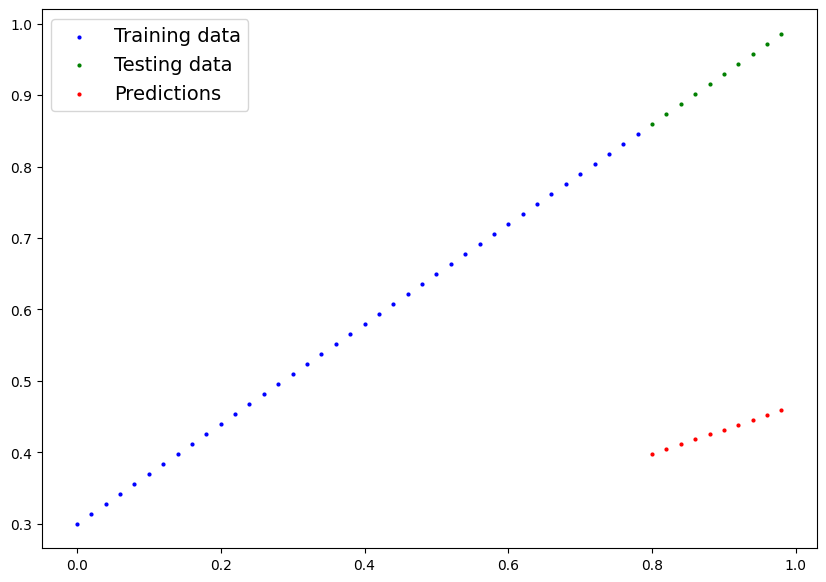

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

哇！这些预测看起来真糟糕...

不过这也很正常，因为我们的模型只是使用随机的参数值来进行预测。

它甚至还没有看过蓝色的点来尝试预测绿色的点。

是时候改变这一点了。


## 3. 训练模型

目前，我们的模型使用随机参数来进行预测，基本上是在随机猜测。

为了解决这个问题，我们可以更新模型的内部参数（我也把 *参数* 称为模式），即我们通过 `nn.Parameter()` 和 `torch.randn()` 随机设置的 `weights` 和 `bias` 值，使它们更好地代表数据。

我们可以硬编码这些值（因为我们知道默认值 `weight=0.7` 和 \`bias=0.3），但那样有什么意思呢？

很多时候，你不会知道模型的理想参数是什么。

相反，更有趣的是编写代码，看看模型是否能够自己找出这些参数。


### 在 PyTorch 中创建损失函数和优化器

为了让我们的模型自动更新其参数，我们需要在配方中添加一些内容。

这些内容包括 **损失函数** 和 **优化器**。

它们的作用分别是：

| 函数       | 它做什么？                                                | 它在 PyTorch 中的位置                                                                             | 常见值                                                                                                                                                                                                                                     |
| -------- | ---------------------------------------------------- | ------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **损失函数** | 测量模型的预测（例如 `y_preds`）与真实标签（例如 `y_test`）之间的差异，数值越小越好。 | PyTorch 在 [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions) 中有很多内置的损失函数。 | 回归问题的平均绝对误差（MAE）（[`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)）。 二元分类问题的二元交叉熵（[`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)）。                         |
| **优化器**  | 告诉模型如何更新其内部参数，以最小化损失。                                | 你可以在 [`torch.optim`](https://pytorch.org/docs/stable/optim.html) 中找到各种优化算法的实现。              | 随机梯度下降（SGD）（[`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)）。 Adam 优化器（[`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)）。 |

让我们创建一个损失函数和优化器来帮助改进我们的模型。

根据你所处理的问题类型，选择的损失函数和优化器也会有所不同。

然而，某些常见的值被认为效果良好，比如 SGD（随机梯度下降）或 Adam 优化器。**对于回归问题（预测一个数字），我们常用 MAE（平均绝对误差）损失函数，而对于分类问题（预测某个类别），我们常用二元交叉熵损失函数。**

对于我们的问题，由于我们在预测一个数字，我们将使用 MAE（即 PyTorch 中的 `torch.nn.L1Loss()`）作为损失函数。

![我们数据的 MAE 损失](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)
*平均绝对误差（MAE，PyTorch 中的 `torch.nn.L1Loss`）衡量两个点（预测值和标签值）之间的绝对差异，然后取所有示例的平均值。*

我们将使用 SGD，`torch.optim.SGD(params, lr)`，其中：

* `params` 是你希望优化的目标模型参数（例如我们之前随机设置的 `weights` 和 `bias`）。
* `lr` 是 **学习率**，它决定了优化器更新参数的速度，学习率越高，优化器尝试的更新越大（这些更新有时可能过大，导致优化器无法有效工作），学习率越低，优化器尝试的更新越小（这些更新有时可能过小，导致优化器找到理想值的时间过长）。学习率被认为是 **超参数**（因为它由机器学习工程师设置）。学习率的常见起始值是 `0.01`、`0.001`、`0.0001`，但这些值也可以随着时间调整（这叫做 [学习率调度](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)）。

哇，这里有很多内容，让我们看看代码是如何实现的。


In [14]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
              lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

### 在 PyTorch 中创建优化循环

哇哦！现在我们有了损失函数和优化器，是时候创建一个 **训练循环**（和 **测试循环**）了。

训练循环包括模型通过训练数据，并学习 `features` 和 `labels` 之间的关系。

测试循环则是通过测试数据并评估模型在训练数据上学到的模式有多好（在训练过程中，模型从未见过测试数据）。

每个循环之所以叫做“循环”，是因为我们希望模型查看（循环查看）每个数据集中的每个样本。

为了创建这些，我们将编写一个 Python `for` 循环，按照 [非官方 PyTorch 优化循环歌曲](https://twitter.com/mrdbourke/status/1450977868406673410?s=20) 的主题（也有 [视频版](https://youtu.be/Nutpusq_AFw)）。

![非官方 PyTorch 优化循环歌曲](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-optimization-loop-song.png)
*非官方 PyTorch 优化循环歌曲，一种有趣的方式来记住 PyTorch 训练（和测试）循环中的步骤。*

这将涉及一些代码，但没有什么我们不能处理的。


### PyTorch 训练循环

对于训练循环，我们将构建以下步骤：

| 序号 | 步骤名称            | 作用                                                                       | 代码示例                              |
| -- | --------------- | ------------------------------------------------------------------------ | --------------------------------- |
| 1  | 前向传递            | 模型遍历所有训练数据一次，执行 `forward()` 函数计算。                                        | `model(x_train)`                  |
| 2  | 计算损失            | 将模型的输出（预测值）与真实标签进行比较，评估预测的误差。                                            | `loss = loss_fn(y_pred, y_train)` |
| 3  | 清除梯度            | 将优化器的梯度清零（默认情况下，梯度是累积的），以便为特定的训练步骤重新计算。                                  | `optimizer.zero_grad()`           |
| 4  | 执行反向传播计算损失的梯度   | 计算损失对每个要更新的模型参数的梯度（每个具有 `requires_grad=True` 的参数）。这称为 **反向传播**，因此叫做“反向”。 | `loss.backward()`                 |
| 5  | 更新优化器（**梯度下降**） | 根据损失梯度更新具有 `requires_grad=True` 的参数，以优化模型。                               | `optimizer.step()`                |

![PyTorch 训练循环注释图](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **注意：** 上述只是步骤的一种排序和描述方式。随着经验的积累，你会发现编写 PyTorch 训练循环是相当灵活的。
>
> 关于步骤的顺序，上面是一个很好的默认顺序，但你可能会看到略有不同的顺序。这里有一些常见的经验法则：
>
> * 在进行反向传播（`loss.backward()`）之前，先计算损失（`loss = ...`）。
> * 在计算损失关于每个模型参数的梯度（`loss.backward()`）之前，先清除梯度（`optimizer.zero_grad()`）。
> * 在进行损失的反向传播（`loss.backward()`）之后，更新优化器（`optimizer.step()`）。

想要了解更多反向传播和梯度下降背后发生的事情，查看课外活动部分的资源。


### PyTorch 测试循环

至于测试循环（评估我们的模型），典型的步骤包括：

| 序号 | 步骤名称       | 作用                                | 代码示例                             |
| -- | ---------- | --------------------------------- | -------------------------------- |
| 1  | 前向传递       | 模型遍历所有测试数据一次，执行 `forward()` 函数计算。 | `model(x_test)`                  |
| 2  | 计算损失       | 将模型的输出（预测值）与真实标签进行比较，评估预测的误差。     | `loss = loss_fn(y_pred, y_test)` |
| 3  | 计算评估指标（可选） | 除了损失值，你可能还想计算其他评估指标，比如测试集上的准确率。   | 自定义函数                            |

注意，测试循环不包括执行反向传播（`loss.backward()`）或更新优化器（`optimizer.step()`），这是因为在测试过程中，模型的参数没有发生变化，它们已经被计算出来。对于测试，我们只关心模型前向传递的输出。

![PyTorch 注释的测试循环](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

让我们将上述内容结合起来，训练我们的模型 100 **轮次**（数据通过的前向传递），并在每 10 轮次后评估一次。


In [15]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # 由于预测结果的数据类型是torch.float，因此需要使用相同类型的张量进行比较。

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())  # 将训练损失值添加到列表中，并将其转换为 NumPy 数组
            test_loss_values.append(test_loss.detach().numpy())  # 将测试损失值添加到列表中，并将其转换为 NumPy 数组
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


太好了！看起来我们的损失在每一轮迭代中都在下降，让我们将它绘制出来以便进一步了解。



> 下图有问题，参考原始笔记



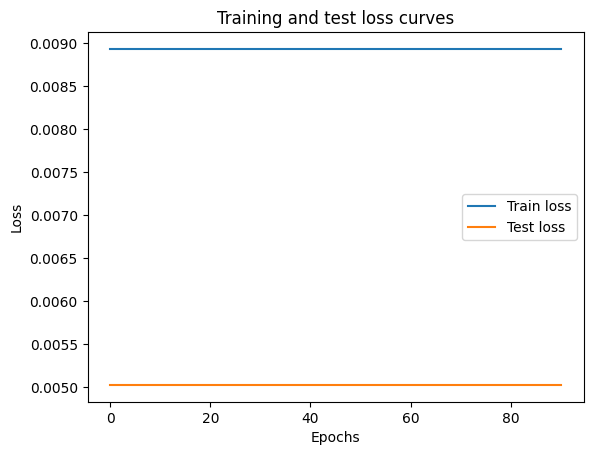

In [18]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

太棒了！**损失曲线**展示了损失随着时间的推移不断下降。记住，损失是衡量模型有多*错误*的指标，所以损失越低越好。

但为什么损失会下降呢？

这是因为我们的损失函数和优化器，更新了模型的内部参数（`weights` 和 `bias`），使它们更好地反映数据中的潜在模式。

让我们检查一下我们模型的 [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html)，看看模型在多接近我们为权重和偏置设置的初始值。


In [16]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.5784]), 'bias': tensor([0.3513])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


哇！这真是太酷了！

我们的模型非常接近地计算出了 `weight` 和 `bias` 的原始值（如果我们继续训练，它可能会更接近）。

> **练习：** 尝试将上面的 `epochs` 值改为 200，看看损失曲线以及模型的权重和偏置参数值会发生什么？

它可能永远也无法*完美*地猜出这些值（特别是当使用更复杂的数据集时），但没关系，通常你可以通过接近的近似值做出非常酷的事情。

这就是机器学习和深度学习的核心思想，**有一些理想的值可以描述我们的数据**，而不是通过手动计算这些值，**我们可以训练一个模型来通过编程方式找出这些值**。


## 4. 使用训练好的 PyTorch 模型进行预测（推理）

一旦你训练了一个模型，通常你会希望用它来进行预测。

我们已经在上面的训练和测试代码中看到了这一点，训练/测试循环外的步骤是类似的。

在使用 PyTorch 模型进行预测（也叫执行推理）时，有三个需要记住的要点：

1. 将模型设置为评估模式（`model.eval()`）。
2. 使用推理模式上下文管理器进行预测（`with torch.inference_mode(): ...`）。
3. 所有预测都应在相同设备上的对象上进行（例如，数据和模型仅在 GPU 上或仅在 CPU 上）。

前两项确保 PyTorch 在训练过程中使用的所有有用的计算和设置（但对推理不必要的）被关闭（这会加快计算速度）。第三项确保你不会遇到跨设备的错误。


In [17]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

太棒了！我们已经用训练好的模型做了一些预测，现在来看一下它们的结果如何吧？


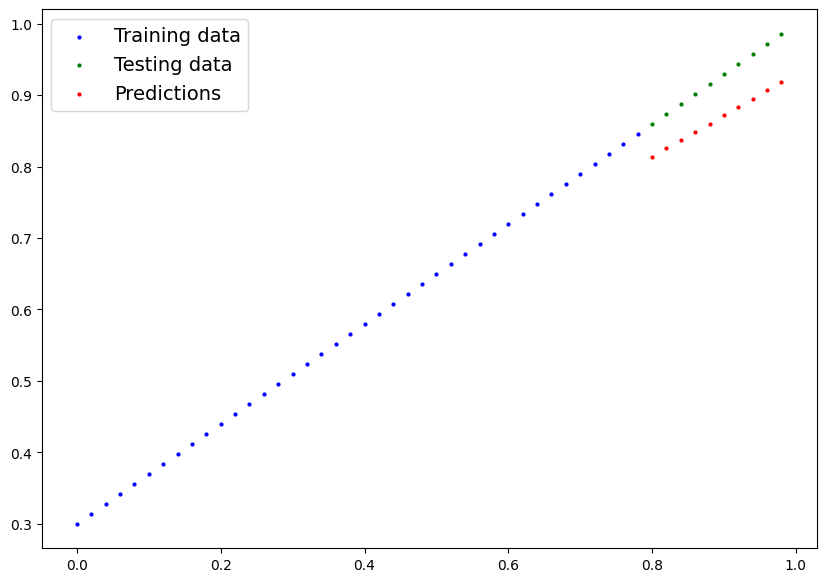

In [18]:
plot_predictions(predictions=y_preds)

哇哦！那些红点看起来比之前更接近了！

现在，让我们继续进行在 PyTorch 中保存和重新加载模型的操作。


## 5. 保存和加载 PyTorch 模型

如果你已经训练了一个 PyTorch 模型，可能会想保存它并将其导出到某个地方。

例如，你可能在 Google Colab 或本地机器上使用 GPU 训练了模型，但现在希望将其导出到某个应用程序，供其他人使用。

或者，也许你想保存模型的进度，然后稍后再加载它。

在 PyTorch 中保存和加载模型，有三种主要方法你需要了解（以下内容均来自 [PyTorch 保存和加载模型指南](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)）：

| PyTorch 方法                                                                                                                                                    | 功能描述                                                                                                                               |
| ------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save)                                                                          | 使用 Python 的 [`pickle`](https://docs.python.org/3/library/pickle.html) 工具将序列化对象保存到磁盘。可以使用 `torch.save` 保存模型、张量以及其他各种 Python 对象，如字典。 |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load)                                                                  | 使用 `pickle` 的反序列化功能，将已序列化的 Python 对象文件（如模型、张量或字典）加载到内存中。你还可以设置将对象加载到哪个设备（如 CPU、GPU 等）。                                             |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict) | 使用已保存的 `state_dict()` 对象加载模型的参数字典（`model.state_dict()`）。                                                                           |

> **注意：** 正如 [Python 的 `pickle` 文档](https://docs.python.org/3/library/pickle.html) 中所述，`pickle` 模块 **不安全**。这意味着你应该仅反序列化（加载）你信任的数据。加载 PyTorch 模型时也是如此。只能使用你信任的来源提供的已保存 PyTorch 模型。


### 保存 PyTorch 模型的 `state_dict()`

[推荐的方式](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)是通过保存和加载模型的 `state_dict()` 来进行推理（进行预测）。

让我们通过几个步骤来看如何实现：

1. 我们将使用 Python 的 `pathlib` 模块创建一个名为 `models` 的目录，用于保存模型。
2. 我们将创建一个文件路径来保存模型。
3. 我们将调用 `torch.save(obj, f)`，其中 `obj` 是目标模型的 `state_dict()`，`f` 是保存模型的文件名。

> **注意：** 在 PyTorch 中，保存的模型或对象通常以 `.pt` 或 `.pth` 结尾，例如 `saved_model_01.pth`。


In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-rw-r-- 1 daniel daniel 1063 Nov 10 16:07 models/01_pytorch_workflow_model_0.pth


### 加载保存的 PyTorch 模型的 `state_dict()`

既然我们已经在 `models/01_pytorch_workflow_model_0.pth` 保存了模型的 `state_dict()`，现在我们可以通过 `torch.nn.Module.load_state_dict(torch.load(f))` 来加载它，其中 `f` 是我们保存的模型 `state_dict()` 的文件路径。

为什么在 `torch.nn.Module.load_state_dict()` 内部调用 `torch.load()`？

因为我们只保存了模型的 `state_dict()`，它是一个包含学习到的参数的字典，而不是 *整个* 模型，我们首先需要通过 `torch.load()` 加载 `state_dict()`，然后将这个 `state_dict()` 传递给我们模型的新实例（它是 `nn.Module` 的子类）。

为什么不保存整个模型？

[保存整个模型](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) 而不是仅保存 `state_dict()` 更直观，但引用 PyTorch 文档（斜体字为我加）：

> 这种方法的缺点（保存整个模型）是序列化数据绑定到保存模型时使用的特定类和精确的目录结构...
>
> 因此，在其他项目中使用或重构后，代码可能会以各种方式出错。

因此，我们使用了更灵活的方法，仅保存和加载 `state_dict()`，它本质上是一个模型参数的字典。

接下来，让我们通过创建另一个 `LinearRegressionModel()` 实例来测试它，该实例是 `torch.nn.Module` 的子类，因此具有内建的 `load_state_dict()` 方法。


In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

太棒了！看起来一切都对得上。

现在，为了测试我们加载的模型，让我们在测试数据上进行推理（做出预测）。

记得使用 PyTorch 模型进行推理的规则吗？

如果不记得，下面是一个复习：

<details>
    <summary>PyTorch 推理规则</summary>
    <ol>
      <li> 将模型设置为评估模式（<code>model.eval()</code>）。</li>
      <li> 使用推理模式上下文管理器进行预测（<code>with torch.inference_mode(): ...</code>）。</li>
      <li> 所有预测都应使用相同设备上的对象（例如，数据和模型都在 GPU 上，或者数据和模型都在 CPU 上）。</li>
    </ol>
</details>


In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

现在我们已经使用加载的模型进行了预测，让我们看看它们是否与之前的预测相同。


In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

不错！

看起来加载后的模型预测与之前的模型预测相同（保存之前的预测）。这表明我们的模型保存和加载工作正常。

> **注意：** 还有更多方法可以保存和加载 PyTorch 模型，但我将把这些留作课外内容和进一步阅读。有关更多信息，请参阅 [PyTorch 保存和加载模型指南](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models)。


## 6. 综合应用

到目前为止，我们已经涵盖了很多内容。

但是，一旦你有了一些实践经验，你会像在街上跳舞一样流畅地完成上述步骤。

说到实践，让我们把到目前为止做的所有内容整合起来。

这次我们会使代码设备无关（如果有 GPU 可用，它将使用 GPU；如果没有，则默认使用 CPU）。

在这一部分，我们的评论会比之前少，因为我们将要做的内容已经在上面讨论过了。

我们将从导入所需的标准库开始。

> **注意：** 如果你使用的是 Google Colab，设置 GPU 的方法是：前往 Runtime -> Change runtime type -> Hardware acceleration -> GPU。如果你这样做，它将重置 Colab 运行时并且你会丢失已保存的变量。


In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

现在，让我们通过设置 device="cuda" （如果 GPU 可用）来使我们的代码设备无关，若没有 GPU 则默认为 device="cpu"。

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


如果你有 GPU 访问权限，上述代码应该会打印出：

```
Using device: cuda
```

否则，接下来的计算将使用 CPU。这对于我们的小数据集来说是可以的，但对于较大的数据集，它可能会花费更长的时间。


### 6.1 数据

让我们像之前一样创建一些数据。

首先，我们将硬编码一些 `weight` 和 `bias` 值。

然后，我们将生成一个介于 0 和 1 之间的数字范围，这些将是我们的 `X` 值。

最后，我们将使用 `X` 值以及 `weight` 和 `bias` 值来通过线性回归公式 (`y = weight * X + bias`) 创建 `y`。


In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

太棒了！

现在我们有了数据，接下来我们将数据拆分为训练集和测试集。

我们将使用 80/20 的拆分方式，80% 用于训练数据，20% 用于测试数据。


In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

太好了，我们来可视化一下数据，确保它们看起来正常。

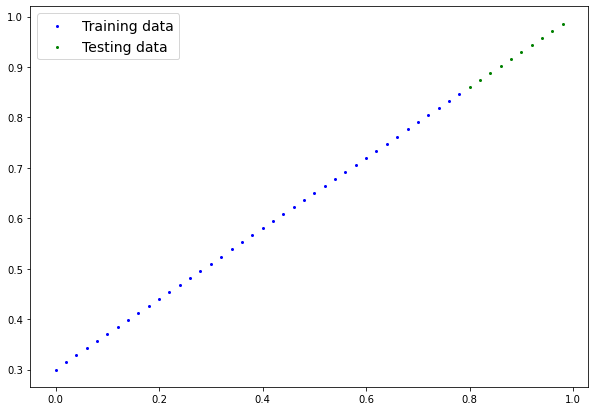

In [ ]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 构建 PyTorch 线性模型

我们已经有了数据，现在是时候构建模型了。

我们将创建与之前相同风格的模型，只不过这次，我们不会手动使用 `nn.Parameter()` 来定义模型的权重和偏置参数，而是使用 [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) 来自动完成这些操作。

其中 `in_features` 是输入数据的维度数量，而 `out_features` 是你希望模型输出的维度数量。

在我们的例子中，这两个值都是 `1`，因为我们的数据每个标签 (`y`) 都有一个输入特征 (`X`)。

![比较 nn.Parameter 线性回归模型和 nn.Linear 线性回归模型](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)
*使用 `nn.Parameter` 和 `nn.Linear` 创建线性回归模型的对比。`torch.nn` 模块中有许多预构建的计算，包括许多流行和有用的神经网络层。*


In [19]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                        out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

注意 `model_1.state_dict()` 的输出，`nn.Linear()` 层为我们创建了一个随机的 `weight` 和 `bias` 参数。

现在，让我们将模型放到 GPU 上（如果可用）。

我们可以使用 `.to(device)` 来更改 PyTorch 对象所在的设备。

首先，检查一下模型当前所在的设备。


In [20]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

太好了，看来模型默认是在 CPU 上。

让我们将其更改为在 GPU 上运行（如果可用）。


In [22]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

很好！由于我们的代码是设备无关的，上面的代码无论是否有 GPU 可用都会正常工作。

如果你确实有访问权限到支持 CUDA 的 GPU，你应该看到类似以下的输出：

```
device(type='cuda', index=0)
```


### 6.3 训练

是时候构建训练和测试循环了。

首先，我们需要一个损失函数和一个优化器。

我们将使用之前用过的函数，`nn.L1Loss()` 和 `torch.optim.SGD()`。

我们需要将新模型的参数（`model.parameters()`）传递给优化器，以便它在训练过程中调整这些参数。

之前使用的学习率 `0.01` 效果不错，我们也可以再次使用这个值。


In [23]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

很棒，损失函数和优化器已经准备好，现在让我们通过训练和测试循环来训练和评估我们的模型。

与之前的训练循环不同的地方是，这次我们将数据放到目标 `device` 上。

我们已经通过 `model_1.to(device)` 将模型放到了目标 `device` 上。

我们也可以对数据执行相同的操作。

这样，如果模型在 GPU 上，数据也会在 GPU 上（反之亦然）。

这次我们将把 `epochs` 设置为 `1000`，提高训练次数。

如果你需要回顾 PyTorch 训练循环的步骤，请参考以下内容。

<details>
    <summary>PyTorch 训练循环步骤</summary>
    <ol>
        <li><b>前向传播</b> - 模型遍历所有训练数据一次，执行其
            <code>forward()</code> 函数的计算
            (<code>model(x_train)</code>)。
        </li>
        <li><b>计算损失</b> - 模型的输出（预测值）与真实值进行比较，评估它们的差距
            (<code>loss = loss_fn(y_pred, y_train)</code>)。
        </li>
        <li><b>清除梯度</b> - 将优化器的梯度清零（默认会累积梯度），以便重新计算当前训练步骤的梯度
            (<code>optimizer.zero_grad()</code>)。
        </li>
        <li><b>反向传播</b> - 计算损失相对于每个模型参数的梯度，所有需要更新的参数
            （<code>requires_grad=True</code>）的梯度都会被计算。这就是所谓的 <b>反向传播</b>，因此叫做 "backwards"
            (<code>loss.backward()</code>)。
        </li>
        <li><b>优化器更新（梯度下降）</b> - 使用损失的梯度来更新所有需要更新的参数
            （<code>requires_grad=True</code>），以便优化它们 (<code>optimizer.step()</code>)。
        </li>
    </ol>
</details>


In [24]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


> **注意：** 由于机器学习的随机性，您可能会得到略微不同的结果（不同的损失值和预测值），这取决于您的模型是训练在 CPU 还是 GPU 上。即使您在两个设备上使用相同的随机种子，这也是成立的。如果差异较大，您可能需要检查是否有错误；但如果差异较小（理想情况下如此），您可以忽略它。

很好！损失值看起来非常低。

让我们检查一下模型所学习的参数，并将其与我们最初硬编码的参数进行比较。


In [25]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


哈哈！现在这模型的参数几乎完美无缺。

不过记住，实际上，很少有情况下你会事先知道完美的参数。

如果你事先就知道模型需要学习的参数，那机器学习又有什么乐趣可言呢？

此外，在许多实际的机器学习问题中，参数的数量可能远远超过千万。

我不知道你怎么样，但我宁愿写代码让计算机来解决这些问题，而不是亲自去手动计算。


### 6.4 做出预测

现在我们有了训练好的模型，让我们将其设置为评估模式，并进行一些预测。


In [26]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

如果你使用 GPU 进行预测，你可能会注意到上面输出的最后部分有 `device='cuda:0'`。这意味着数据位于 CUDA 设备 0 上（即系统可以访问的第一个 GPU，由于零索引）。如果将来使用多个 GPU，这个数字可能会更高。

现在，让我们绘制模型的预测结果。

> **注意：** 许多数据科学库，如 pandas、matplotlib 和 NumPy，无法使用存储在 GPU 上的数据。所以，当你尝试使用这些库中的函数处理未存储在 CPU 上的张量数据时，可能会遇到一些问题。为了解决这个问题，你可以在目标张量上调用 [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html)，将目标张量的副本移到 CPU 上。


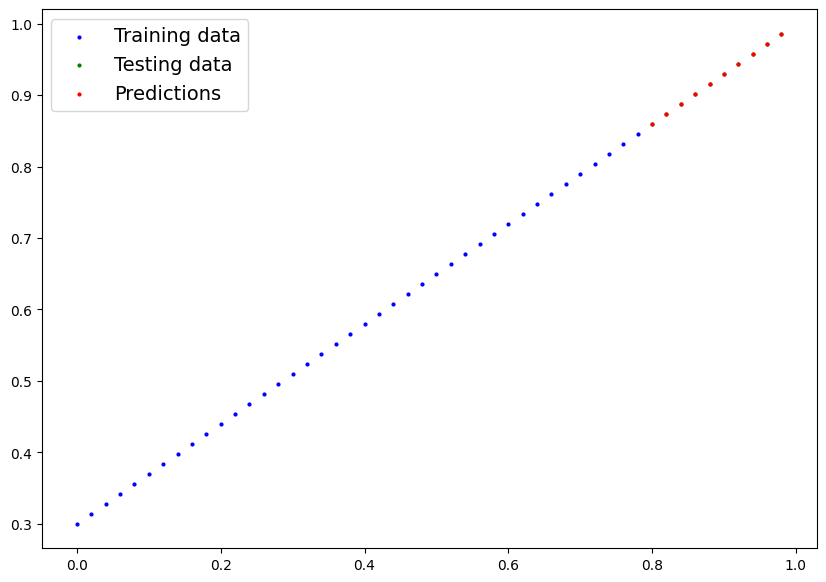

In [27]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

哇！看看那些红点，它们几乎和绿点完美对齐。我猜多训练几个 epoch 起了作用。


### 6.5 保存和加载模型

我们对模型的预测结果很满意，所以让我们将其保存到文件中，以便以后使用。


In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


为了确保一切正常，我们将模型重新加载。

我们将：

* 创建一个新的 `LinearRegressionModelV2()` 类的实例
* 使用 `torch.nn.Module.load_state_dict()` 加载模型的状态字典
* 将模型的新实例发送到目标设备（确保我们的代码是设备无关的）


In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


现在我们可以评估加载的模型，看看它的预测是否与保存之前的预测一致。


In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

一切都对得上！太棒了！

嗯，我们已经走了很长一段路。现在你已经在 PyTorch 中构建并训练了你的前两个神经网络模型！

是时候练习你的技能了。


## 练习

所有练习都从笔记本中的代码中获取灵感。

每个主要部分都有一个练习。

你应该能够通过参考它们的具体部分来完成它们。

> **注意：** 对于所有练习，您的代码应该是设备无关的（意味着它可以在 CPU 或 GPU 上运行，如果 GPU 可用）。

1. 创建一个使用线性回归公式 (`weight * X + bias`) 的直线数据集。

* 设置 `weight=0.3` 和 `bias=0.9`，总共有至少 100 个数据点。
* 将数据分为 80% 训练集和 20% 测试集。
* 绘制训练数据和测试数据，使其变得可视化。

2. 通过子类化 `nn.Module` 构建一个 PyTorch 模型。

* 里面应该有一个随机初始化的 `nn.Parameter()`，`requires_grad=True`，一个用于 `weights`，一个用于 `bias`。
* 实现 `forward()` 方法，计算你用来创建数据集的线性回归函数。
* 构建好模型后，创建该模型的一个实例并检查其 `state_dict()`。
* **注意：** 如果你想使用 `nn.Linear()` 而不是 `nn.Parameter()`，也是可以的。

3. 使用 `nn.L1Loss()` 和 `torch.optim.SGD(params, lr)` 分别创建损失函数和优化器。

* 将优化器的学习率设置为 0.01，优化的参数应该是你在第 2 步中创建的模型参数。
* 编写训练循环，执行适当的训练步骤，共进行 300 个 epoch。
* 训练循环应每 20 个 epoch 测试一次模型在测试集上的表现。

4. 使用训练好的模型在测试数据上进行预测。

* 将这些预测与原始的训练和测试数据进行可视化比较（**注意：** 如果你想使用不支持 CUDA 的库（如 matplotlib）绘制图形，你可能需要确保预测数据不在 GPU 上）。

5. 将训练好的模型的 `state_dict()` 保存到文件中。

* 创建一个新的 `LinearRegressionModelV2()` 类实例，并将刚保存的 `state_dict()` 加载到它中。
* 使用加载的模型对测试数据进行预测，并确认它们与第 4 步中的原始模型预测一致。

> **资源：** 请参考课程 GitHub 上的 [练习笔记本模板](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/exercises) 和 [解决方案](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions)。

## 课外内容

* 听 [The Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw)（帮助记住 PyTorch 训练/测试循环中的步骤）。
* 阅读 Jeremy Howard 的 [What is `torch.nn`, really?](https://pytorch.org/tutorials/beginner/nn_tutorial.html)，深入理解 PyTorch 中最重要的模块之一是如何工作的。
* 花 10 分钟浏览并查看 [PyTorch 文档备忘单](https://pytorch.org/tutorials/beginner/ptcheat.html)，了解你可能会遇到的各种 PyTorch 模块。
* 花 10 分钟阅读 [PyTorch 网站上的加载和保存文档](https://pytorch.org/tutorials/beginner/saving_loading_models.html)，熟悉 PyTorch 中不同的保存和加载选项。
* 花 1-2 小时阅读/观看以下内容，了解梯度下降和反向传播的内部工作原理，这两种主要的算法在后台帮助我们的模型学习。

  * [梯度下降 Wikipedia 页面](https://en.wikipedia.org/wiki/Gradient_descent)
  * [梯度下降算法深度解析](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) by Robert Kwiatkowski
  * [梯度下降，神经网络如何学习视频](https://youtu.be/IHZwWFHWa-w) by 3Blue1Brown
  * [反向传播到底在做什么？](https://youtu.be/Ilg3gGewQ5U) by 3Blue1Brown
  * [反向传播 Wikipedia 页面](https://en.wikipedia.org/wiki/Backpropagation)
